<center><h3>Projeto SkillUp | Data and Analytics Upskilling<h3></center>

# Organização e entregáveis

### Stoytelling dos dados de chamados da Prefeitura de Curitiba - Jul/Ago/Set/Out/Nov de 2023

### Entregáveis

1 - Número de chamados por mês ✅<br>
2 - Bairros com a maior incidência de chamados abertos ✅<br>
3 - Análise do período de abertura dos chamados (madrugada/manhã/tarde/noite) ✅<br>
4 - Análise do sexo das pessoas que abrem os chamados ✅<br>
6 - Análise do tipo de chamado aberto (solicitação, reclamação e elogio) ✅<br>
7 - Medidas estatisticas<br>

### Relatório

- Descrição das variáveis

### Limpeza da base

1 - Coluna BAIRRO_CIDADAO não normalizada - correção da base para melhor análise - corrigir nomes totalmente em maíusculas




# Importação das bibliotecas

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.mode.chained_assignment = None

# Importação dos dados

In [3]:
# Read datasets from Datasets folder

# Reading all datasets
df1 = pd.read_excel('Datasets/Nov 2023 - 156 - Base de Dados.xlsx')
df2 = pd.read_excel('Datasets/Oct 2023 - 156 - Base de Dados.xlsx')
df3 = pd.read_excel('Datasets/Set 2023 - 156 - Base de Dados.xlsx')
df4 = pd.read_excel('Datasets/Ago 2023 - 156 - Base de Dados.xlsx')
df5 = pd.read_excel('Datasets/Jul 2023 - 156 - Base de Dados.xlsx')

# Elimitate the first row of the datasets 
df1 = df1.drop([0])
df2 = df2.drop([0])
df3 = df3.drop([0])
df4 = df4.drop([0])
df5 = df5.drop([0])

# Contatenate the datasets
df = pd.concat([df1, df2, df3, df4, df5])

df


,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
1,10348816,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:06:32,Fauna sinantrópica,Morcegos,Solicita orientações em relação a morcegos. Ci...,"Rua Serafim Lucca, 437",SAO BRAZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10348817,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:06:56,Poluição,Atmosférica,SOLICITA FISCALIZAÇÃO QUANTO À POLUIÇÃO ATMOSF...,"RUA FERNANDO DE NORONHA, 456",SANTA CANDIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10348819,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:14:49,Fiscalização do comércio estabelecido,Comércio diurno,SOLICITA FISCALIZAÇÃO DE COMÉRCIO ESTABELECIDO...,"RUA FERNANDO DE NORONHA, 456",SANTA CANDIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10348828,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:42:59,Corrida de rua,Informações sobre corrida - adulto,Reclama quanto a falta de sinalização nas ruas...,"AVENIDA ÁGUA VERDE, 56",AGUA VERDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10348827,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:40:33,Passeio,Autorização para protetor de passeio,SOLICITA ESCLARECIMENTOS SOBRE O EVENTO THE HA...,"PARQUE AFONSO BOTELHO, 0",AGUA VERDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32217,10196169,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,01:44:46,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"AVENIDA PRESIDENTE AFFONSO CAMARGO, 330",JARDIM BOTANICO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32218,10196171,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,02:29:53,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"RUA RAPOSO TAVARES, 45",PILARZINHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32219,10196172,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,02:34:11,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"RUA MARANHÃO, 1710",PORTAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32220,10196176,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,02:52:54,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"AVENIDA SENADOR SALGADO FILHO, 6473",UBERABA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpeza da base

In [4]:
# Drop all rows with SEXO = I
df = df[df['SEXO'] != 'I']

# Drop all the Unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop rows with discrepant Date of Birth
df['DATA_NASC'] = pd.to_datetime(df['DATA_NASC'], errors='coerce')

df = df[(df['DATA_NASC'].dt.year >= 1925) & (df['DATA_NASC'].dt.year <= 2020)]

# Normalização da coluna BAIRRO_CIDADAO

df['BAIRRO_CIDADAO'] = df['BAIRRO_CIDADAO'].str.capitalize()

df

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
1,10348816,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:06:32,Fauna sinantrópica,Morcegos,Solicita orientações em relação a morcegos. Ci...,"Rua Serafim Lucca, 437",SAO BRAZ,Unidade Regional Santa Felicidade,EMAIL,NaN,M,São braz,Unidade Regional Santa Felicidade,1972-02-25,CIDADÃO,SECRETARIA MUNICIPAL DA SAÚDE,Conclusão - Automática
2,10348817,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:06:56,Poluição,Atmosférica,SOLICITA FISCALIZAÇÃO QUANTO À POLUIÇÃO ATMOSF...,"RUA FERNANDO DE NORONHA, 456",SANTA CANDIDA,Unidade Regional Boa Vista,EMAIL,"No endereço, ao lado do ponto de referência.",M,Santa cândida,Boa Vista,1973-01-10,CIDADÃO,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,Pesquisa realizada
3,10348819,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:14:49,Fiscalização do comércio estabelecido,Comércio diurno,SOLICITA FISCALIZAÇÃO DE COMÉRCIO ESTABELECIDO...,"RUA FERNANDO DE NORONHA, 456",SANTA CANDIDA,Unidade Regional Boa Vista,EMAIL,NO ENDEREÇO E AO LADO DO PONTO DE REFERÊNCIA.,M,Santa cândida,Boa Vista,1973-01-10,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Pesquisa realizada
4,10348828,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:42:59,Corrida de rua,Informações sobre corrida - adulto,Reclama quanto a falta de sinalização nas ruas...,"AVENIDA ÁGUA VERDE, 56",AGUA VERDE,Unidade Regional Portao,EMAIL,NaN,F,Jardim social,Matriz,1994-07-16,CIDADÃO,"SECRETARIA MUNICIPAL DO ESPORTE, LAZER E JUVEN...",Conclusão - Resposta Aceita
5,10348827,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:40:33,Passeio,Autorização para protetor de passeio,SOLICITA ESCLARECIMENTOS SOBRE O EVENTO THE HA...,"PARQUE AFONSO BOTELHO, 0",AGUA VERDE,Unidade Regional Portao,EMAIL,NaN,M,Reboucas,Matriz,1984-01-12,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Conclusão - Automática
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32217,10196169,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,01:44:46,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"AVENIDA PRESIDENTE AFFONSO CAMARGO, 330",JARDIM BOTANICO,Unidade Regional Matriz,TELEFONE,NaN,M,Rebouças,Unidade Regional Matriz,1984-06-15,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante
32218,10196171,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,02:29:53,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"RUA RAPOSO TAVARES, 45",PILARZINHO,Unidade Regional Boa Vista,EMAIL,Ressalta que o cidadão está próximo a cruz do ...,F,Planta almirante,NaN,1987-09-11,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Envio do e-mail de resposta
32219,10196172,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,02:34:11,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"RUA MARANHÃO, 1710",PORTAO,Unidade Regional Portao,TELEFONE,INFORMA QUE A VIA É ESQUINA COM AVENIDA PRESID...,F,Portao,Unidade Regional Portao,1946-06-22,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Responder para o solicitante
32220,10196176,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-07-01 00:00:00,02:52:54,Abordagem social de rua - Adulto e Idoso,Pessoas/famílias em desabrigo na rua,Solicita abordagem para pessoa(s) morando em v...,"AVENIDA SENADOR SALGADO FILHO, 6473",UBERABA,Unidade Regional Cajuru,EMAIL,NaN,F,Uberaba,Unidade Regional Cajuru,1951-06-19,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Envio do e-mail de resposta


### 1 - Número de ocorrências por mês (têndencias aprensentadas mês a mês)

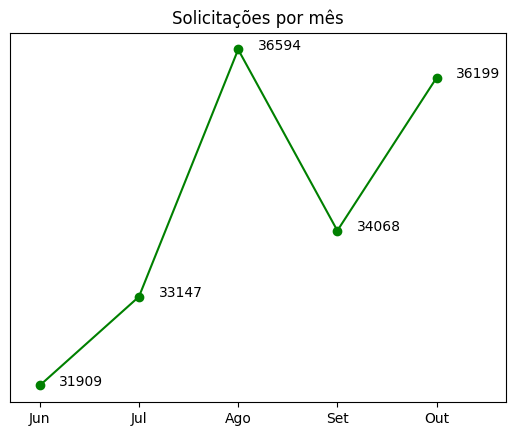

In [5]:
# Convert the DATA column to datetime
df['DATA'] = pd.to_datetime(df['DATA'])

# Extract the month from the DATA column
df['MONTH'] = df['DATA'].dt.month

solicitations_by_month = df['MONTH'].value_counts().sort_index()

solicitations_by_month = solicitations_by_month[:-1]

months = ['Jun','Jul','Ago','Set','Out']


plt.plot(months, solicitations_by_month, color='green', marker='o', linestyle='solid')

for x,y in zip(months,solicitations_by_month):
    label = y
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(30,0), ha='center')

# Set the x-axis limits
plt.xlim(-0.3, len(months)-0.3)

# Hide the values on the Y-axis
plt.yticks([])

plt.title('Solicitações por mês')
plt.show()




### 2 - Bairros com maior concentração de chamados

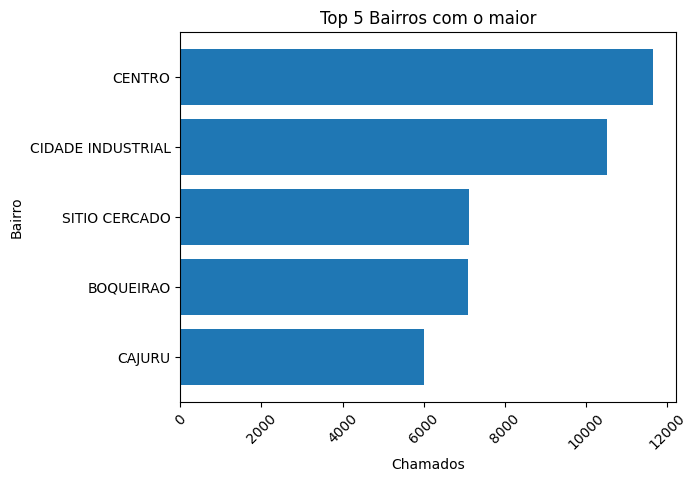

In [6]:
# Número de ligações por bairro
count_bairro = df.groupby('BAIRRO_ASS')['SOLICITACAO'].count().to_frame().sort_values(by='SOLICITACAO', ascending=False)

# Top 5
top_5_neighborhoods = count_bairro.head(5).sort_values(by='SOLICITACAO', ascending=True)

# Gráfico
plt.barh(top_5_neighborhoods.index, top_5_neighborhoods['SOLICITACAO'])
plt.xlabel('Chamados')
plt.ylabel('Bairro')
plt.title('Top 5 Bairros com o maior')
plt.xticks(rotation=45)
plt.show()





### 3 - Top 10 assuntos mais recorrentes e a quantidade de reclamações correspondentes

In [7]:
count_assunto = df['ASSUNTO'].value_counts().sort_values(ascending=False).to_frame()
top_10_assuntos = count_assunto.head(10)

for assunto, qty in top_10_assuntos.iterrows():
    count_reclamacoes = 0
    for index, row in df.iterrows():
        if row['ASSUNTO'] == assunto and row['TIPO'] == 'Reclamação':
            count_reclamacoes = count_reclamacoes + 1
    
    top_10_assuntos.loc[assunto, 'COUNT_RECLAMACAO'] = count_reclamacoes
    

print(top_10_assuntos)


                                          count  COUNT_RECLAMACAO
ASSUNTO                                                          
Coleta                                    36406             629.0
Trânsito                                  28322             246.0
Iluminação pública - Via pública          22019             159.0
Abordagem social de rua - Adulto e Idoso  19043              58.0
Posto de saúde                             7604            4771.0
Pavimentação                               5595             219.0
Animais domésticos                         4939              32.0
Cartão transporte                          3480            1642.0
Árvore                                     3237             115.0
Drenagem                                   2574              35.0


### 4 - Análise de correlação entre os tipos de chamados abertos e o horário do dia (manhã/tarde/noite)<br>

             SOLICITACAO
PERIODO_DIA             
Tarde              57755
Manha              54414
Noite              53161
Madrugada           6607


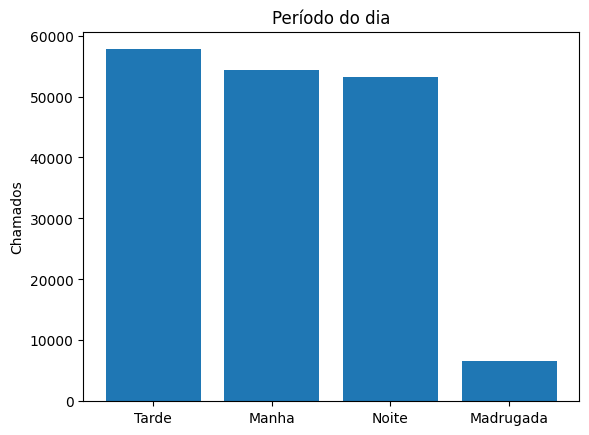

In [8]:
# Funcao para obter o periodo do dia com base no horario
def get_periodo(row):
    horario = row['HORARIO'].hour
    if horario < 6:
        return 'Madrugada'
    elif horario < 12 and horario > 6:
        return 'Manha'
    elif horario < 18 and horario > 12:
        return 'Tarde'
    else:
        return 'Noite'

# Cria coluna no main DataFrame com o periodo do dia
df['PERIODO_DIA'] = df.apply(get_periodo, axis=1)

# Novo DataFrame agrupando com base no periodo do dia
count_periodo = df.groupby('PERIODO_DIA')['SOLICITACAO'].count().to_frame().sort_values(by='SOLICITACAO', ascending=False)

print(count_periodo)

# Gráfico
plt.bar(count_periodo.index, count_periodo['SOLICITACAO'])
# plt.xlabel('Periodo do dia')
plt.ylabel('Chamados')
plt.title('Período do dia')
plt.show()




### 5 - Análise do tipo de chamado aberto (solicitação, reclamação e elogio)

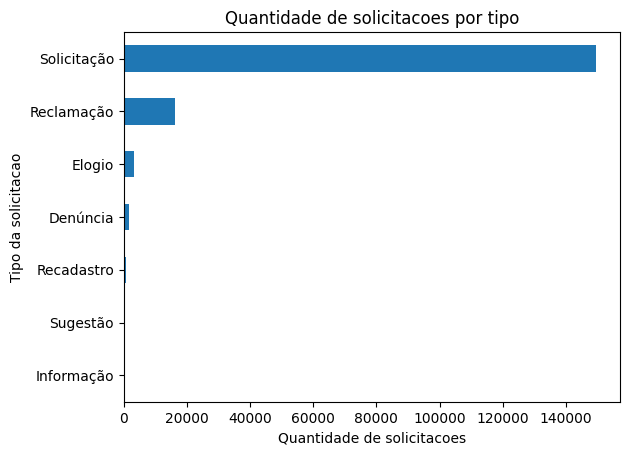

In [9]:
# Count the number of occurrences of each TYPE
count_type = df['TIPO'].value_counts().sort_values(ascending=True)

count_type.plot(kind='barh')
plt.xlabel('Quantidade de solicitacoes')
plt.ylabel('Tipo da solicitacao')
plt.title('Quantidade de solicitacoes por tipo')

# Show the plot
plt.show()



### 6 - Medidas estatísticas

In [10]:
# Obs: A coluna possui dados discrepantes (Ex: Datas de nascimento em 1900, 1901, 1902, etc.)

df['DATA_NASC'] = pd.to_datetime(df['DATA_NASC'], errors='coerce')

highest_data = df['DATA_NASC'].max()
lowest_data = df['DATA_NASC'].min()
media_data = df['DATA_NASC'].mean()
count_tipo_solicitacoes = df[df['TIPO'] == 'Solicitação'].count()['TIPO']

p_tipo_solicitacao = (count_tipo_solicitacoes/df.shape[0])*100

print(f"Porcentagem de solicitações do tipo: Solicitação {p_tipo_solicitacao:.2f}%")
print(f"A data de nascimento mais recente cadastrada na base de dados {highest_data}")
print(f"A data de nascimento mais antiga cadastrada na base de dados {lowest_data}")
print(f"A data de nascimento média da base de dados {media_data}")

Porcentagem de solicitações do tipo: Solicitação 87.00%
A data de nascimento mais recente cadastrada na base de dados 2020-02-15 00:00:00
A data de nascimento mais antiga cadastrada na base de dados 1925-02-20 00:00:00
A data de nascimento média da base de dados 1975-06-05 15:56:16.048203680


### 7 - Proporção de solicitações com base no sexo

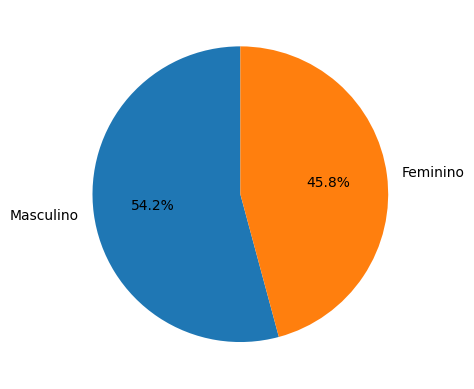

In [11]:
count_sex = df['SEXO'].value_counts().sort_values(ascending=False)

plt.pie(count_sex, labels=['Masculino', 'Feminino'], autopct='%1.1f%%', startangle=90)

plt.show()